In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

**Importing the dataset**

In [19]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
df.drop('User ID', axis=1, inplace =True)
df["Gender"]=df["Gender"].replace({"Male":0,"Female":1})

**Splitting the dataset into the Training set and Test set**

In [21]:
X=df.iloc[:,:3].values
y=df.iloc[:,3].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


**Feature Scaling**

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Fitting K-NN to the Training set**

In [26]:
# Finding the best K value By plotting the Accuracy
k_value = np.arange(1,25,2) #range(1,25), odd numbers are choosen for r values since it ios a binary classification 
#since we have even number of output class (6) I take k values as output numbers
k_score_1=[]
k_score_2=[]

# Change the value of p to change the plot of accuracy and error from manhattan to Euclidian if needed.

Score for manhattan method
    k_value   K_score
0         1  0.853571
1         3  0.882143
2         5  0.900000
3         7  0.896429
4         9  0.900000
5        11  0.903571
6        13  0.892857
7        15  0.885714
8        17  0.882143
9        19  0.867857
10       21  0.867857
11       23  0.850000


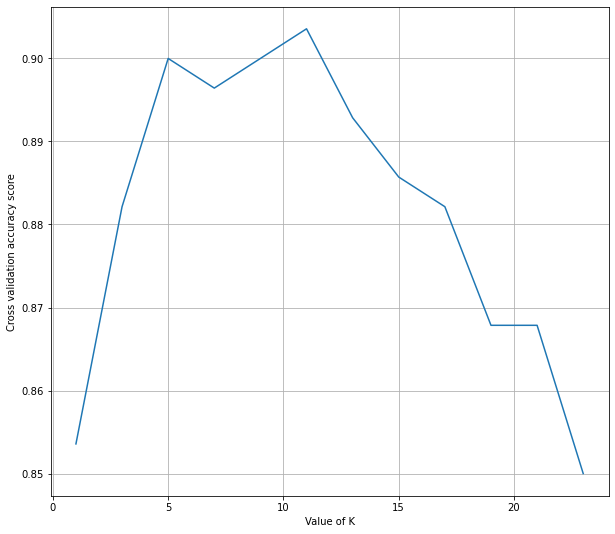

In [27]:
#for manhattan_distance 
for i in k_value:
  model_1 = KNeighborsClassifier(n_neighbors=i, p=1,metric='minkowski') 
  # score = accuracy 
  scores = cross_val_score(model_1,X_train,y_train,cv=5,scoring='accuracy')
  k_score_1.append(scores.mean())

df_score_1= pd.DataFrame({'k_value': k_value, 'K_score':k_score_1})
print("Score for manhattan method")
print(df_score_1)  

plt.figure(figsize=(10,9))
plt.plot(k_value,k_score_1)
plt.xlabel('Value of K')
plt.ylabel('Cross validation accuracy score')
plt.grid(True)
plt.show()
     

Score for euclidian method
    k_value   K_score
0         1  0.850000
1         3  0.885714
2         5  0.900000
3         7  0.903571
4         9  0.896429
5        11  0.900000
6        13  0.900000
7        15  0.885714
8        17  0.871429
9        19  0.871429
10       21  0.857143
11       23  0.864286


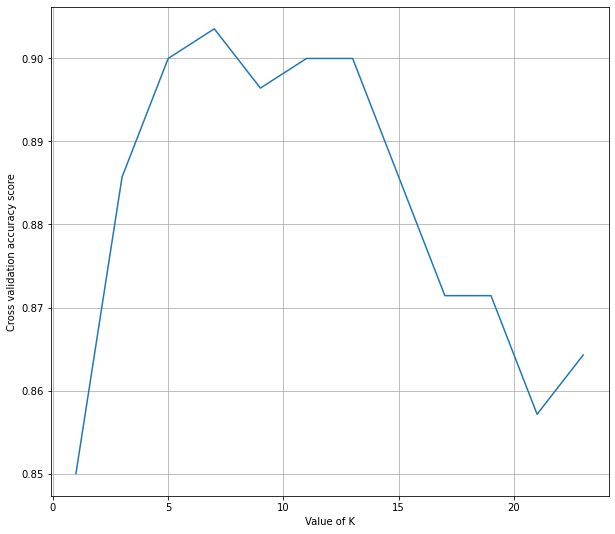

In [12]:
#for euclidian distance 
for i in k_value:
  model_1 = KNeighborsClassifier(n_neighbors=i, p=2,metric='minkowski') 
  # score = accuracy 
  scores = cross_val_score(model_1,X_train,y_train,cv=5,scoring='accuracy')
  k_score_2.append(scores.mean())

df_score_2= pd.DataFrame({'k_value': k_value, 'K_score':k_score_2})
print("Score for euclidian method")
print(df_score_2) 

plt.figure(figsize=(10,9))
plt.plot(k_value,k_score_2)
plt.xlabel('Value of K')
plt.ylabel('Cross validation accuracy score')
plt.grid(True)
plt.show()

**Predicting the Test set results**

In [28]:
# lets take manhattan with k value as 11 here , which gives higher value as it appears in the graph
model = KNeighborsClassifier(n_neighbors=11, p=1,metric='minkowski') 
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [29]:
y_pred =model.predict(X_test)

**Making the Confusion Matrix**

In [30]:
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[73  6]
 [ 4 37]]


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



In [32]:
accuracy_score(y_test,y_pred)

0.9166666666666666